In [1]:
# import 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# set random seed for reproduceable code:
np.random.seed(306)
plt.style.use('seaborn')


In [3]:
# we will use shufflesplit cross validation with 10 folds and
# set aside 20% examples as test examples

shuffle_split_cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state =0)

# create 10 folds through shuffle split by keeping aside 20 % examples as test in each field

## STEP 1: LOAD DATASET

In [5]:
# load the california housing dataset
# as_frame returns df in pandas
features, labels = fetch_california_housing(as_frame = True, return_X_y= True)


print('shape of feature matrix is',features.shape)
print('shape of label matrix is',labels.shape)

shape of feature matrix is (20640, 8)
shape of label matrix is (20640,)


## STEP 2: Data Exploration

Data exploration 

## STEP 3: Preprocessing and model Building

### 3.1 Train test Split

The first step is to split the training data into training and test set. All the data exploration and tuning is performed on the training set by setting small percent of training set as validation set.

In [7]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, random_state = 42) 

In [10]:
## Lets examine the shape of training and test sets.

print('# training samples', train_features.shape[0])
print('# test samples', test_features.shape[0])

# training samples 15480
# test samples 5160


### 3.2 Pipeline : Preprocessing + model


In [11]:
# set up the linear regression model:

lin_reg_pipeline =  Pipeline([('feature_scaling', StandardScaler()),
                              ('lin_reg', LinearRegression())])

# train linear regression model with normal equation:
lin_reg_pipeline.fit(train_features, train_labels)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [12]:
# check the estimated weight vectors

print('intercept (w0)', lin_reg_pipeline[-1].intercept_)
print('weight vectors(w_1,....)', lin_reg_pipeline[-1].coef_)

intercept (w0) 2.0703489205426377
weight vectors(w_1,....) [ 0.85210815  0.12065533 -0.30210555  0.34860575 -0.00164465 -0.04116356
 -0.89314697 -0.86784046]


## Step 4: Model Evaluation

#### Score

In [14]:
# evaluate the model performance on the test set

test_score = lin_reg_pipeline.score(test_features, test_labels)
print('Model performance on test set', test_score)

train_score = lin_reg_pipeline.score(train_features, train_labels)
print('Model performance on train set', train_score)

Model performance on test set 0.5910509795491352
Model performance on train set 0.609873031052925


In [15]:
# the score method returns the r2 score whose best value is 1.
# the test performance and train perfromance are comparable >> Underfitting

#### cross_val_score

since the score was computed on one fold. It may not be robust.

In [16]:
lin_reg_score = cross_val_score(lin_reg_pipeline, 
                                train_features,
                                train_labels,
                                scoring = 'neg_mean_squared_error',
                                cv = shuffle_split_cv)

# This will return 10 different scores, one for each fold

print(lin_reg_score)

# we can take the mean and std deviation of the score and report it: 
print(lin_reg_score.mean())
print(lin_reg_score.std())

[-0.50009976 -0.52183352 -0.55931218 -0.52110499 -0.56059203 -0.50510767
 -0.52386194 -0.54775518 -0.5007161  -0.54713448]
-0.5287517875396764
0.022232904569798703


In [17]:
# convert the negative MSE as a score. We can convert the error as:

lin_reg_mse = - lin_reg_score

print(lin_reg_mse.mean())

print(lin_reg_mse.std())

0.5287517875396764
0.022232904569798703


In [18]:
# we could also use different scoring parameters here

In [20]:
# cross val score gives us only the score for each fold
# If we also need access the model trained on each fold:

lin_reg_cv_results = cross_validate(lin_reg_pipeline,
                                    train_features,
                                    train_labels,
                                    cv = shuffle_split_cv,
                                    scoring = "neg_mean_squared_error",
                                    return_train_score = True,
                                    return_estimator = True)

# the lin_reg_cv_result is a dictionary with the following contents:

In [21]:
lin_reg_cv_results

{'fit_time': array([0.02008104, 0.03004456, 0.04264951, 0.0501895 , 0.05009604,
        0.05429363, 0.05335212, 0.04875612, 0.05610275, 0.05190849]),
 'score_time': array([0.00700355, 0.00726247, 0.01012659, 0.00984955, 0.01096058,
        0.01149225, 0.01239324, 0.01193047, 0.01100016, 0.01025724]),
 'estimator': [Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('featu

In [22]:
# we compare the training and test errors to access generalization performance of our model.
# however, we have training and test scores in cv_results dictionary

train_error = -1 * lin_reg_cv_results['train_score']
test_error = -1 * lin_reg_cv_results['test_score']

print(train_error.mean())
print(train_error.std())
print(test_error.mean())
print(test_error.std())

0.5186840759388985
0.005552249067390945
0.5287517875396764
0.022232904569798703


In [23]:
# The training and test errors are high which indicates the problem of underfitting

### Effect of training set size on error


In [ ]:
def plot_learning_curve(train_sizes, train_scores, test_score)

In [25]:
# learning curve api

train_size, train_score, test_score, fit_times, score_times = \
learning_curve(lin_reg_pipeline, 
               train_features,
               train_labels,
               cv= shuffle_split_cv,
               scoring = 'neg_mean_squared_error',
               n_jobs = -1,
               return_times = True,
               train_sizes = np.linspace(0.2,0.1,10))
plot_learning_curve(train_sizes, train_scores, test_scores)

NameError: ignored

## Model examination:

In [27]:
# lets examine the weight vectors and check how much variability exists between them across different cross-validated models:

feature_names = train_features.columns
feature_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

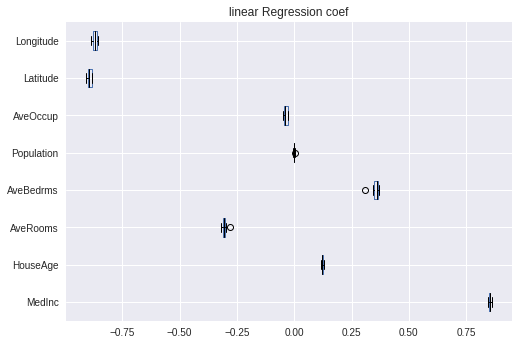

In [31]:
# for this we will first construct a dataframe of weight vectors and then plot them with box plot:

coefs = [est[-1].coef_ for est in lin_reg_cv_results['estimator']]
weights_df = pd.DataFrame(coefs, columns = feature_names)

color = {"whiskers":"black", "medians":"black", "caps":"black"}
weights_df.plot.box(color= color, vert = False) #, figsize =(6,16))
_ = plt.title("linear Regression coef")

In [32]:
weights_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.852153,0.122770,-0.304384,0.353528,-0.001576,-0.037059,-0.894011,-0.869753
std,0.005763,0.004312,0.010998,0.018044,0.003254,0.008582,0.009975,0.009097
min,0.843517,0.117394,-0.318971,0.307474,-0.005787,-0.047584,-0.908058,-0.884206
25%,0.848871,0.119895,-0.310778,0.349715,-0.002688,-0.042486,-0.901411,-0.876542
50%,0.852711,0.121592,-0.305795,0.360139,-0.002063,-0.042325,-0.895370,-0.869631
75%,0.854743,0.125520,-0.302980,0.364646,-0.000350,-0.027562,-0.883967,-0.862110
max,0.861659,0.130560,-0.278426,0.367952,0.005297,-0.026331,-0.881884,-0.857844


# Selecting the Best Model:

In [33]:
best_model_index = np.argmin(test_error)
selected_model = lin_reg_cv_results['estimator'][best_model_index]

In [34]:
selected_model['lin_reg'].intercept_

2.0779898917958657

In [35]:
selected_model['lin_reg'].coef_

array([ 8.44324888e-01,  1.18463901e-01, -3.04619574e-01,  3.56620503e-01,
        1.74458509e-04, -4.23964612e-02, -8.96045642e-01, -8.68906479e-01])

# Model Performance

In [40]:
# towards this lets first obtain the prediction for test points in cross validation
from sklearn.model_selection import cross_val_predict
cv_predictions = cross_val_predict(lin_reg_pipeline, train_features, train_labels)

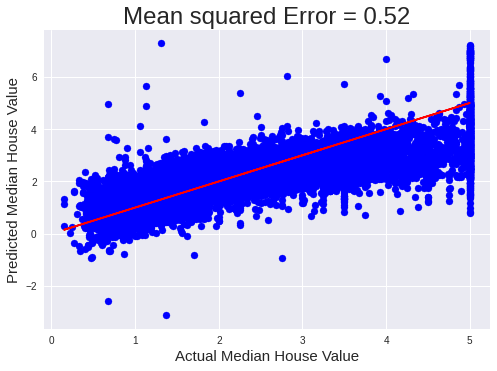

In [41]:
mse_cv = mean_squared_error(train_labels, cv_predictions)

plt.scatter(train_labels, cv_predictions, color = 'blue')
plt.plot(train_labels, train_labels, 'r-')
plt.title(f"Mean squared Error = {mse_cv:.2f}", size = 24)
plt.xlabel('Actual Median House Value', size = 15)
plt.ylabel('Predicted Median House Value', size = 15)
plt.show()


In [43]:
# step 5: Predictions:
# we can use the best performing model from cross validation for getting prediction on test set

test_predictions_cv = selected_model.predict(test_features)
test_predictions_cv[:5]

array([0.73548515, 1.7725621 , 2.70011199, 2.83716602, 2.60743151])

In [45]:
# prediction using initial model that we built using cross validation
test_predictions = lin_reg_pipeline.predict(test_features)
test_predictions[:5]

array([0.72412832, 1.76677807, 2.71151581, 2.83601179, 2.603755  ])

# step 6: report the model performance

In [47]:

score_cv = selected_model.score(test_features, test_labels)
score = lin_reg_pipeline.score(test_features, test_labels)

print(score_cv)
print(score)

0.5923577635319088
0.5910509795491352


In [49]:
# Alternatively we can use any other metric of interest and report performance based on that. 

mse = mean_squared_error(test_labels, test_predictions)
mse_cv =  mean_squared_error(test_labels, test_predictions_cv)

print(mse_cv)
print(mse)
# the cv has better mse than model w/o cross validation

0.5393995876218523
0.5411287478470688
